# Title: Exploratory Data Analysis on Haberman's Survival Data Set

### Haberman Survival Data Set

The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.
  

#### Lets load various packages to do EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Lets load the data

In [2]:
df= pd.read_csv('haberman.csv')

In [3]:
#Lets visualize first few rows 
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Above we see that pandas is using the first row in the dataset as column header.
-- 
We will change this:

In [7]:
df=pd.read_csv('haberman.csv',names=['Age','Year','No_of_nodes','Class'])

In [8]:
#lets now view the data set
df.head()

,Age,Year,No_of_nodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Lets answer following questions:
- How many data-points and features are there in the dataset?
- What are the column names in our dataset?
- How many data points for each class are present?


In [9]:
# No of datapoints and features
df.shape

(306, 4)

From above we conclude that 
* No of datapoints in the dataset = 306
* No of Features/Attributes = 4

In [17]:
# Column names / Features
df.columns

Index(['Age', 'Year', 'No_of_nodes', 'Class'], dtype='object')

In [12]:
# No of DataPoints for each class
df['Class'].value_counts()

1    225
2     81
Name: Class, dtype: int64

Above we can see that no of data points belonging to class 1 is 225 and no of data points belonging to class 2 is 81 .
* Lets see what percentage of points are there for each class 

###### Percentage of points in Class 1

In [21]:
print(str((df['Class'].value_counts()[1])/(df['Class'].value_counts()[1]+df['Class'].value_counts()[2])*100) + ' %')

73.5294117647 %


###### Percentage of points in Class 2

In [22]:
print(str((df['Class'].value_counts()[2])/(df['Class'].value_counts()[1]+df['Class'].value_counts()[2])*100) + ' %')

26.4705882353 %


Since 73.52 % of datapoints belong to Class 1 and 26.47 % of datapoints belong to Class 2 we say this is an imbalanced dataset.

## Attribute Information

**Input Attributes :**
* Age of patient at time of operation (numerical)
* Patient's year of operation (year -1900, numerical) 
* Number of positive axillary nodes detected (numerical)


** Output Attribute :**
-- Survival status (class attribute):
* 1 = the patient survived 5 years or longer 
* 2 = the patient died within 5 year


## Lets us know what is our Goal/Objective of Analysis

### Domain Knowledge required

As I am student of Biotechnology let me just give you an overview of problem at hand.

Haberman  Survival dataset  contains  the  survival  status  of  the  patients  who had  undergone  breast  cancer  surgery.  The dataset has  306  samples  each of  which has 3 attributes. For this data 225 patients survived more than 5 years post surgery and 81 patients died within 5 years. The goal for this data is to predict the class (dead or alive) using the 3 input variables.


The axillary nodes are a group of lymph nodes located in the axillary (or armpit) region of the body. They perform the vital function of filtration and conduction of lymph from the upper limbs, pectoral region, and upper back.

When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive.

### Objective

To classify a new patient wether if the patient will survive for more than 5 years after the operation or not. Given the Age , year of operation and no of positive nodes detected of the patient.
The three predictors are age of patient when the surgery was conducted, years of operations, and the number of positive axillary nodes detected.Our Objective is to find the attributes that affect survival status.

# Univariate Analysis

Let us do univariate analysis to know importance of each features , if they individually give us some information.

In [82]:
df1=df[df['Class']==1]
drf2=df.loc[df['Class']==2]
print('The patient survived >= 5 years') 
print(df1.describe())
print('\n')

print('The patient died within 5 year') 
print(df2.describe())

The patient survived >= 5 years
              Age        Year  No_of_nodes  Class
count  225.000000  225.000000   225.000000  225.0
mean    52.017778   62.862222     2.791111    1.0
std     11.012154    3.222915     5.870318    0.0
min     30.000000   58.000000     0.000000    1.0
25%     43.000000   60.000000     0.000000    1.0
50%     52.000000   63.000000     0.000000    1.0
75%     60.000000   66.000000     3.000000    1.0
max     77.000000   69.000000    46.000000    1.0


The patient died within 5 year
             Age       Year  No_of_nodes  Class
count  81.000000  81.000000    81.000000   81.0
mean   53.679012  62.827160     7.456790    2.0
std    10.167137   3.342118     9.185654    0.0
min    34.000000  58.000000     0.000000    2.0
25%    46.000000  59.000000     1.000000    2.0
50%    53.000000  63.000000     4.000000    2.0
75%    61.000000  65.000000    11.000000    2.0
max    83.000000  69.000000    52.000000    2.0


In [115]:
# percentage of people who survived for more than three years and detected zero positive axillary nodes
len(df1[df['No_of_nodes']==0])/len(df1['No_of_nodes'])*100

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


52.0

## Histograms

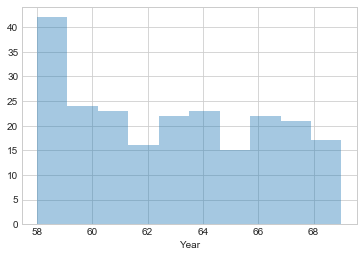

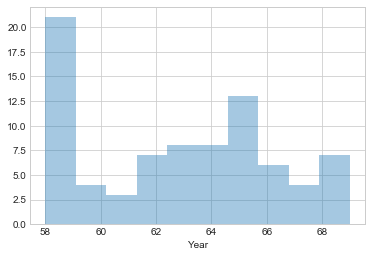

In [92]:
sns.distplot(df1['Year'],bins=10,kde=False)
plt.show()
sns.distplot(df2['Year'],bins=10,kde=False)
plt.show()

We can see that the starting year(1958) has the most number of observations. 

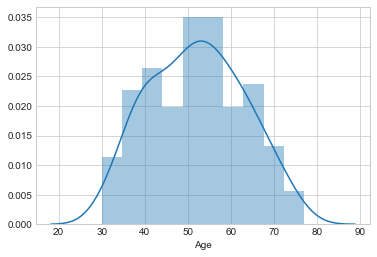

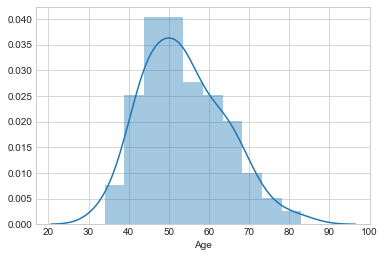

In [91]:
sns.distplot(df1['Age'],bins=10,kde=True)
plt.show()
sns.distplot(df2['Age'],bins=10,kde=True)
plt.show()

We observe that age follows a Normal/Gaussian distribution .

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


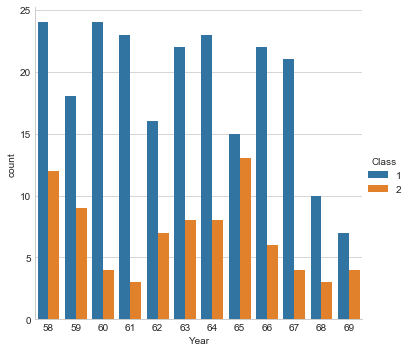

In [96]:
sns.factorplot(data=df, x='Year', kind='count', hue='Class', size=5)
plt.show()

** Observation :**
* Above plot is an evidence for proving that number of survival(for more than five years) is more each year except in 1965 where the difference is less.

### PDF

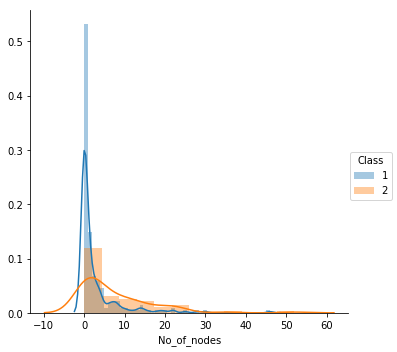

In [23]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(sns.distplot, 'No_of_nodes') \
   .add_legend()
plt.show()

** Observation **
* From the above PDF we can see that probability of having zero auxillary nodes is quite high. 

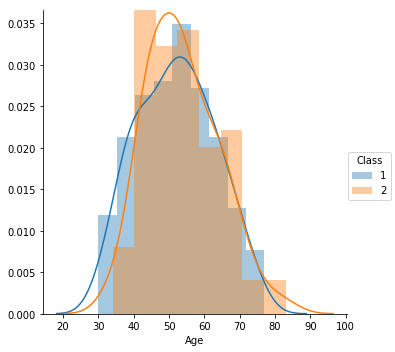

In [26]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(sns.distplot, 'Age') \
   .add_legend()
plt.show()

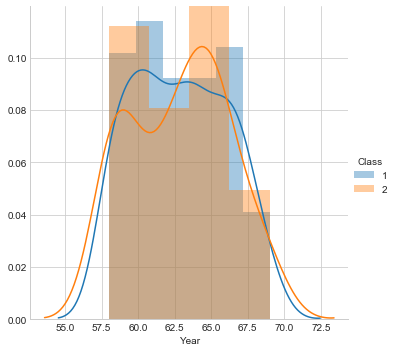

In [61]:
sns.FacetGrid(df,hue='Class',size=5).map(sns.distplot,'Year').add_legend()
plt.show()

### CDF

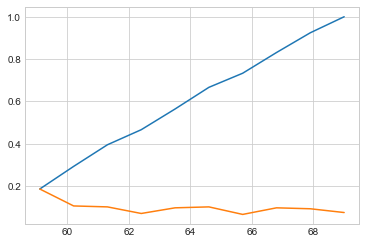

In [63]:
counts,bin_edges=np.histogram(df1['Year'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

plt.show()

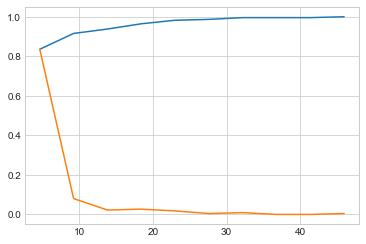

In [64]:
counts,bin_edges=np.histogram(df1['No_of_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

plt.show()

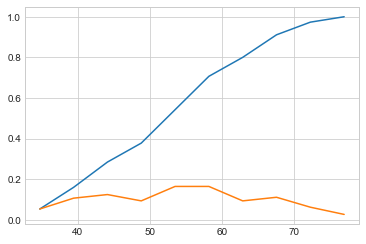

In [65]:
counts,bin_edges=np.histogram(df1['Age'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],pdf)

plt.show()

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


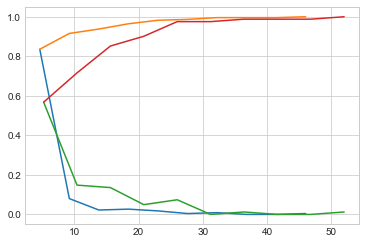

In [66]:


counts, bin_edges = np.histogram(df1['No_of_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(df2['No_of_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

## Box Polt

### Box Plot for Age 

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


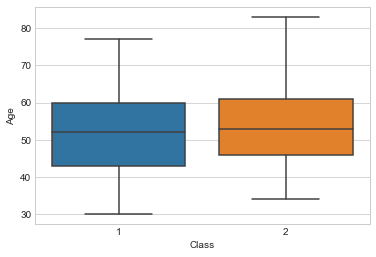

In [72]:
sns.boxplot(x='Class',y='Age',data=df)
plt.show()

### Box plot year of operation

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


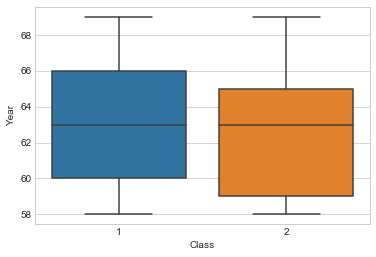

In [74]:
sns.boxplot(x='Class',y='Year',data=df)
plt.show()

### Box plot of Axillary nodes detected

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


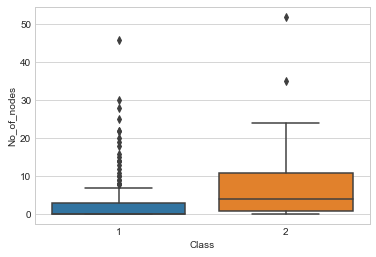

In [76]:
sns.boxplot(x='Class',y='No_of_nodes',data=df)
plt.show()

## Violin Plots

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
E:\ANACONDA\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


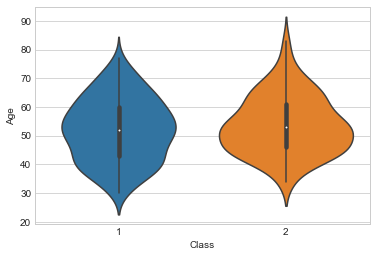

In [77]:
sns.violinplot(x='Class',y='Age',data=df)
plt.show()

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
E:\ANACONDA\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


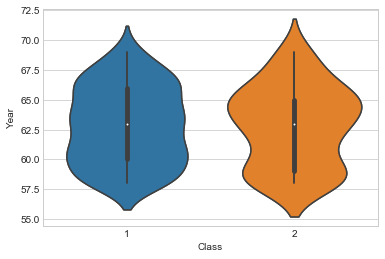

In [79]:
sns.violinplot(x='Class',y='Year',data=df)
plt.show()

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
E:\ANACONDA\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


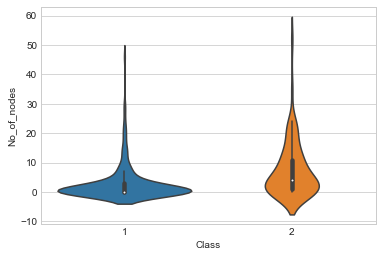

In [80]:
sns.violinplot(x='Class',y='No_of_nodes',data=df)
plt.show()

** Observations from Univariate Analysis**
* Mean age of patients survived for 5 or more than 5 years: 52 
* Mean age of patients did not survived within 5 years : 53
* There is no much difference between PatientAge in both group.Hence we see that Age is not a significant feature.
* We see that average number of nodes of people who did not survived is about 7 and average number of nodes of people who survived is 2 hence we can say that people having less number of auxillary nodes survived.
* About 75% of patients who survived for more than 5 years had axillary node <=3.
* About 50 % of patients who did not survived had axillary node >=4.
* So we conclude that number of auxillary nodes detected is the most important feature to predict whether a new patient will survive for more than five years or not.

## Bivariate Analysis

## Scatter Plot

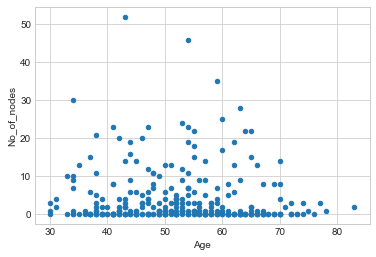

In [128]:
df.plot(kind='scatter',x='Age',y='No_of_nodes')
plt.show()

Above we see that most age groups have axillary node zero

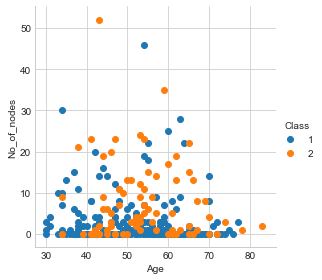

In [99]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Class',size=4)\
    .map(plt.scatter,'Age','No_of_nodes')\
    .add_legend()

plt.show()

From above diagram we can clearly see that patients who didn't survived more than 5 years had more non zero axillary node than those who survived more than 5 years.

# Pair Plot

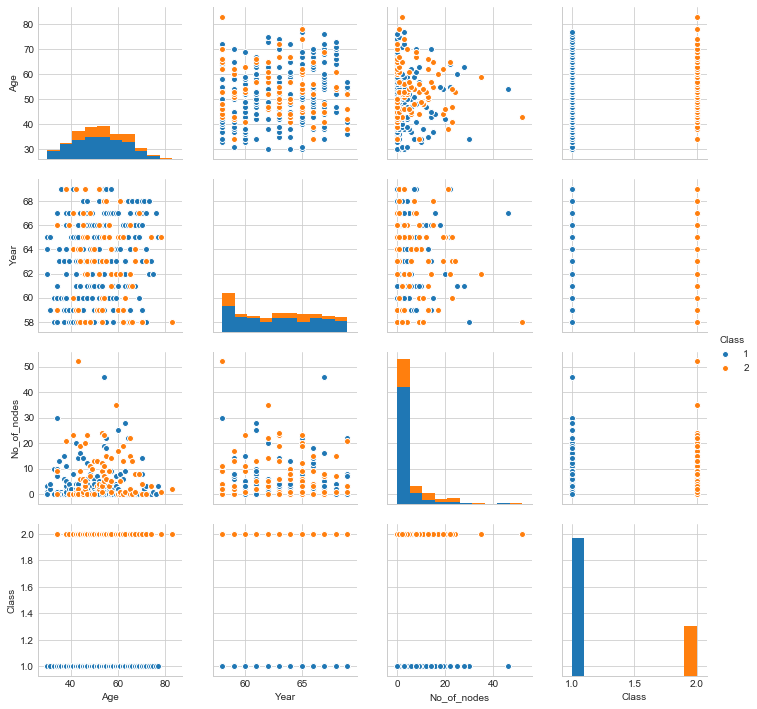

In [114]:
sns.pairplot(df,hue='Class')
plt.show()

On analysing the above pair plot there are no two combination of features that significantly important to clearly distinguish between the Class 1(survided more than 5 years) and Class 2(died within 5 years) datapoints .

# Contour Plot

b'Class 1\n'


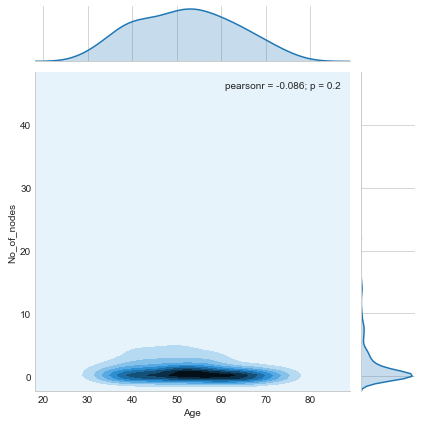

Class 2



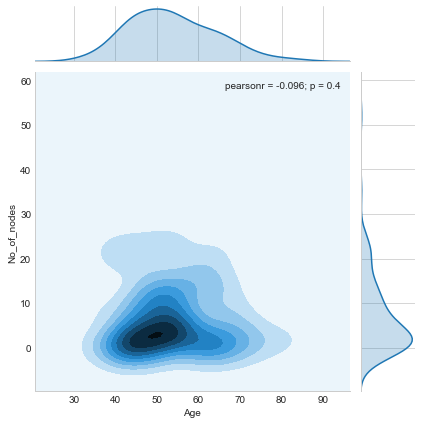

In [127]:
print('Class 1\n')
sns.jointplot('Age','No_of_nodes',kind='kde',data=df1)
plt.show()
print("Class 2\n")
sns.jointplot('Age','No_of_nodes',kind='kde',data=df2)
plt.show()


In the above plot its interesting to notice that the spread in number of nodes in Class 2 is more than the spread in the number of nodes is Class 1 .

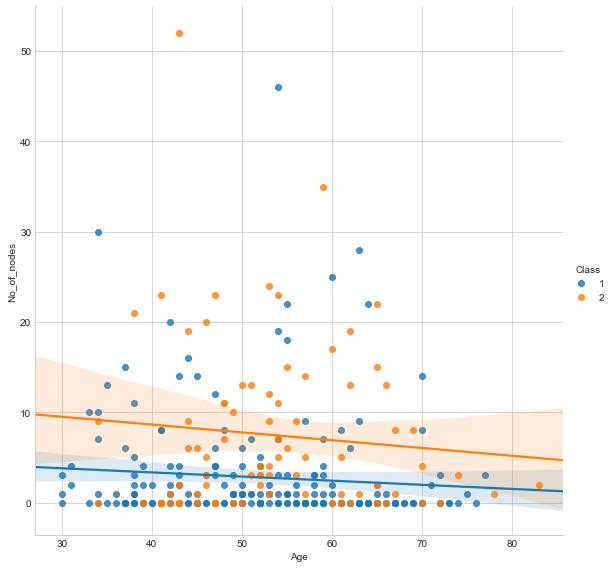

In [122]:
sns.lmplot(data=df, x='Age', y='No_of_nodes', hue='Class', size=8)
plt.show()

From the above plot we can see that lower the number of positively detected nodes more the chances of surviving. The Class 1 line is lower than class 2 line.
The number of positive axillary nodes detected is by far the most important feature to predict whether a new patient may survive more than 5 years or not.